In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets, linear_model, metrics, tree
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score,f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.feature_selection import chi2, SelectKBest, f_regression
import xgboost as xgb

In [2]:
#Importing the dataset
df = pd.read_csv('Housing.csv')

In [3]:
#Making a copy
original_df = pd.read_csv('Housing.csv')

In [4]:
#Display first 5 rows of data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Understanding Data

In [5]:
#dimensions of data
df.shape

(545, 13)

In [6]:
#describe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.min()

price                 1750000
area                     1650
bedrooms                    1
bathrooms                   1
stories                     1
mainroad                   no
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
prefarea                   no
furnishingstatus    furnished
dtype: object

In [9]:
df.max()

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
prefarea                    yes
furnishingstatus    unfurnished
dtype: object

In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
# Selects columns according to a particular dtype 
df.select_dtypes(include = 'int')

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


# Outlier Detection

In [12]:
df['area']

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

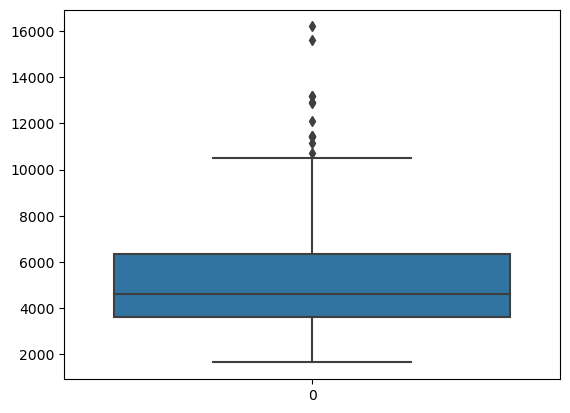

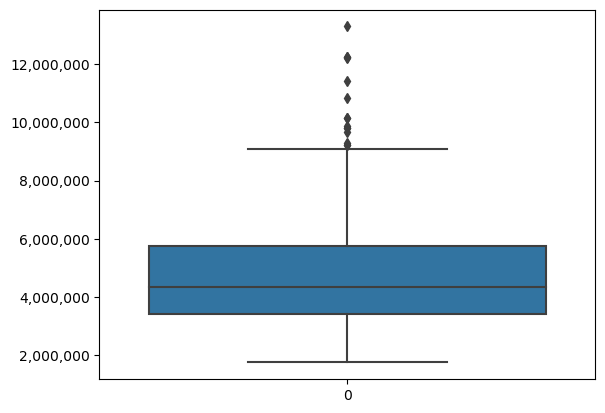

In [13]:
#https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/   Resource on outlier detection
sns.boxplot(df['area'])
plt.show()
sns.boxplot(df['price'])
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.show()
#Visualisng outliers 

In [14]:
df[df['area']>10000].sort_values(by = 'area')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
224,4760000,10240,2,1,1,yes,no,no,no,yes,2,yes,unfurnished
171,5250000,10269,3,1,1,yes,no,no,no,no,1,yes,semi-furnished
277,4305000,10360,2,1,1,yes,no,no,no,no,1,yes,semi-furnished
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
146,5600000,10500,2,1,1,yes,no,no,no,no,1,no,semi-furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished


# Exploratory Data Analysis

In [15]:
col_categorical = ['mainroad','guestroom', 'basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in col_categorical:
    print(col.upper(), '\n', df[col].value_counts(),'\n')

MAINROAD 
 yes    468
no      77
Name: mainroad, dtype: int64 

GUESTROOM 
 no     448
yes     97
Name: guestroom, dtype: int64 

BASEMENT 
 no     354
yes    191
Name: basement, dtype: int64 

HOTWATERHEATING 
 no     520
yes     25
Name: hotwaterheating, dtype: int64 

AIRCONDITIONING 
 no     373
yes    172
Name: airconditioning, dtype: int64 

PREFAREA 
 no     417
yes    128
Name: prefarea, dtype: int64 

FURNISHINGSTATUS 
 semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64 



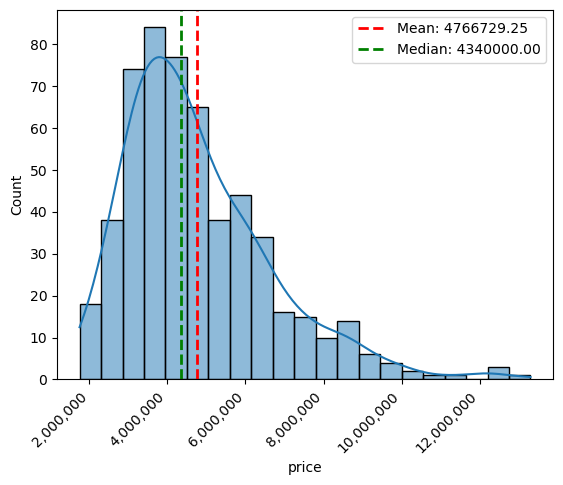

In [16]:
mean_value_price = np.mean(df['price'])
median_value_price = np.median(df['price'])

sns.histplot(df['price'], kde = True)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation = 45, ha = 'right')

plt.axvline(mean_value_price, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value_price:.2f}")
plt.axvline(median_value_price, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value_price:.2f}")
plt.legend()

plt.show()

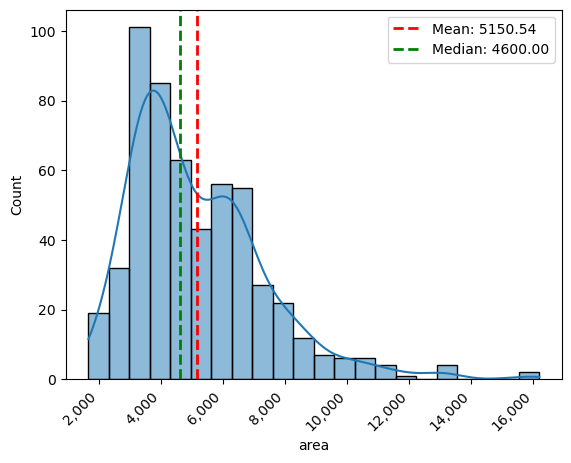

In [17]:
mean_value_area = np.mean(df['area'])
median_value_area = np.median(df['area'])

sns.histplot(df['area'], kde = True)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation = 45, ha = 'right')

plt.axvline(mean_value_area, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value_area:.2f}")
plt.axvline(median_value_area, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value_area:.2f}")
plt.legend()

plt.show()

# Analysing mainroad column

In [19]:
contingency_table_mainroad_prefarea = pd.crosstab(df['mainroad'],df['prefarea'])
print(contingency_table_mainroad_prefarea)

prefarea   no  yes
mainroad          
no         75    2
yes       342  126


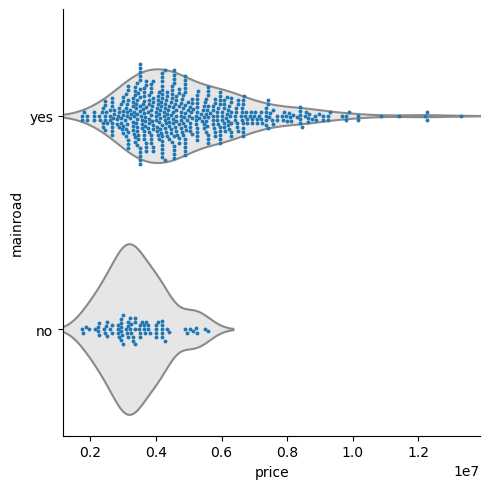

In [18]:
#for col in col_categorical:
sns.catplot(x='price',y='mainroad', data = df, kind = 'violin', color = ".9", inner = None)
sns.swarmplot(x='price',y='mainroad', data = df, size = 2.8) 
plt.show()

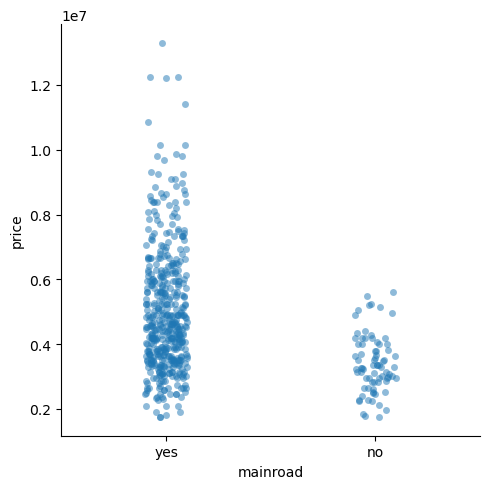

In [20]:
sns.catplot(x='mainroad',y='price', data = df, alpha = 0.5) 
plt.show()

# UNIVARIATE AND BIVARIATE ANALYSIS OF CATEGORIAL FEATURES 

DATA FOR MAINROAD 

 COUNTS PER CATEGORY MAINROAD: 
 yes    468
no      77
Name: mainroad, dtype: int64 

MEAN VALUES WRT PRICE: MAINROAD 
 mainroad
no     3398905
yes    4991777
Name: price, dtype: int64 

MIN AND MAX WRT PRICE: mainroad 
           min_check  max_check
mainroad                      
no          1750000    5600000
yes         1750000   13300000 

25th QUANTILE WRT PRICE: MAINROAD 
 mainroad
no     2835000.0
yes    3638250.0
Name: price, dtype: float64 

50th QUANTILE WRT PRICE: MAINROAD 
 mainroad
no     3290000.0
yes    4550000.0
Name: price, dtype: float64 

75th QUANTILE WRT PRICE: MAINROAD 
 mainroad
no     3990000.0
yes    5967500.0
Name: price, dtype: float64 



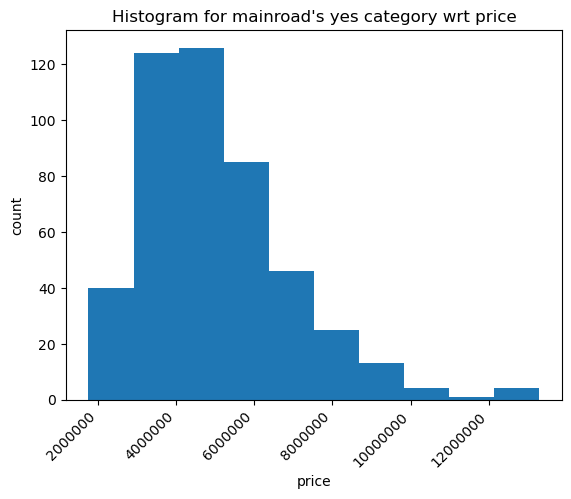

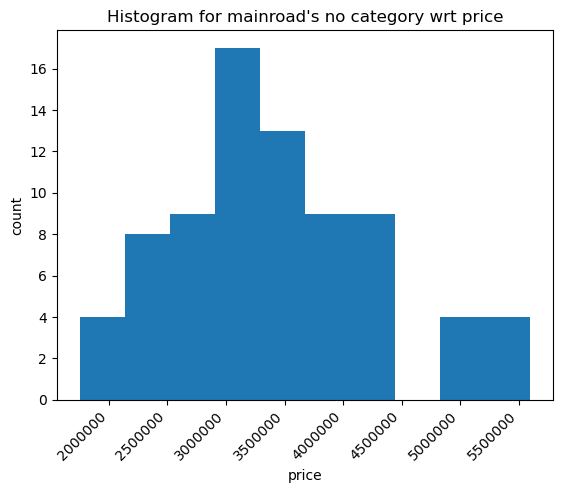

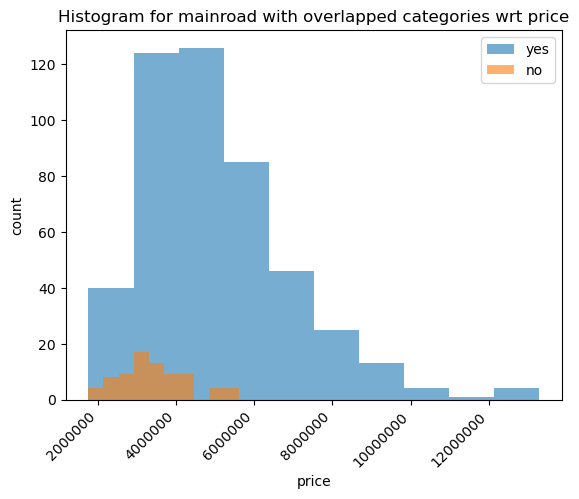








DATA FOR GUESTROOM 

 COUNTS PER CATEGORY GUESTROOM: 
 no     448
yes     97
Name: guestroom, dtype: int64 

MEAN VALUES WRT PRICE: GUESTROOM 
 guestroom
no     4544546
yes    5792897
Name: price, dtype: int64 

MIN AND MAX WRT PRICE: guestroom 
            min_check  max_check
guestroom                      
no           1750000   13300000
yes          2450000   11410000 

25th QUANTILE WRT PRICE: GUESTROOM 
 guestroom
no     3347750.0
yes    4690000.0
Name: price, dtype: float64 

50th QUANTILE WRT PRICE: GUESTROOM 
 guestroom
no     4165000.0
yes    5495000.0
Name: price, dtype: float64 

75th QUANTILE WRT PRICE: GUESTROOM 
 guestroom
no     5258750.0
yes    6419000.0
Name: price, dtype: float64 



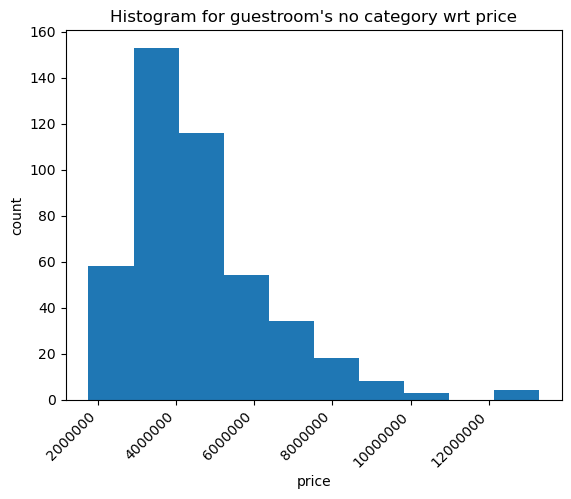

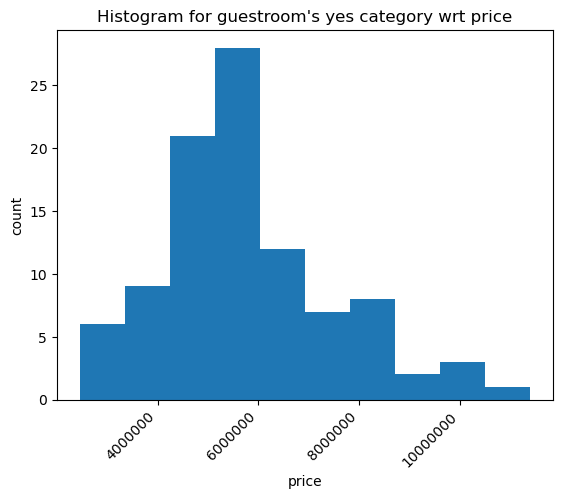

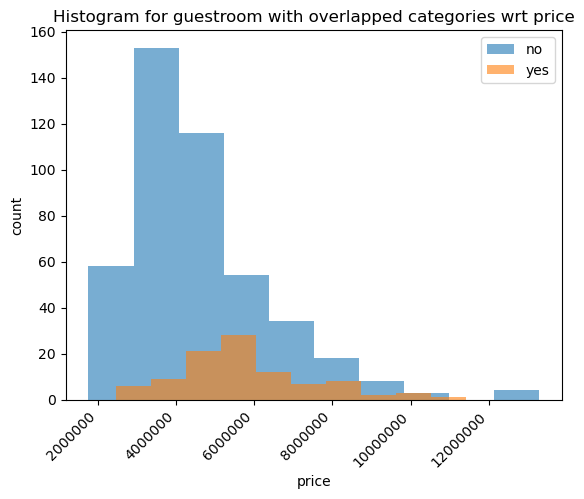








DATA FOR BASEMENT 

 COUNTS PER CATEGORY BASEMENT: 
 no     354
yes    191
Name: basement, dtype: int64 

MEAN VALUES WRT PRICE: BASEMENT 
 basement
no     4509966
yes    5242615
Name: price, dtype: int64 

MIN AND MAX WRT PRICE: basement 
           min_check  max_check
basement                      
no          1750000   13300000
yes         1820000   12250000 

25th QUANTILE WRT PRICE: BASEMENT 
 basement
no     3228750.0
yes    3998750.0
Name: price, dtype: float64 

50th QUANTILE WRT PRICE: BASEMENT 
 basement
no     4077500.0
yes    4900000.0
Name: price, dtype: float64 

75th QUANTILE WRT PRICE: BASEMENT 
 basement
no     5556250.0
yes    6020000.0
Name: price, dtype: float64 



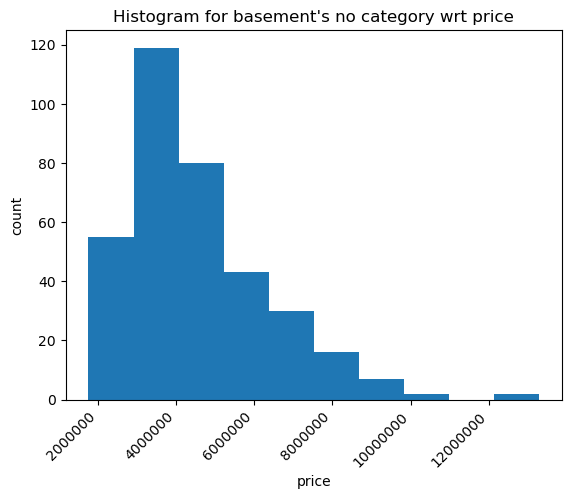

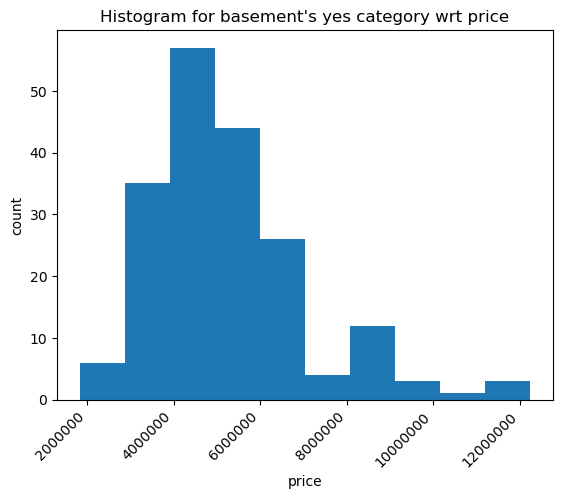

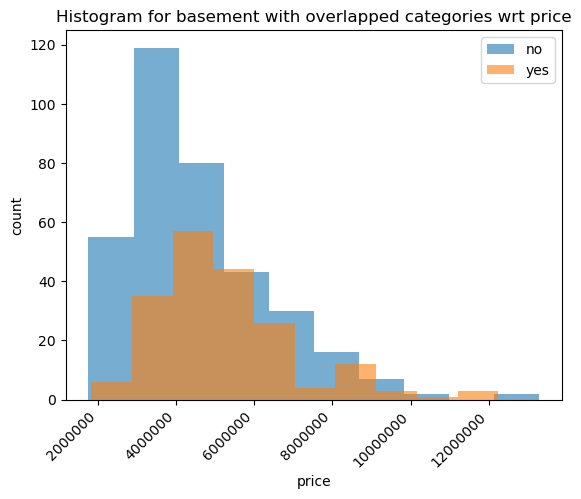








DATA FOR HOTWATERHEATING 

 COUNTS PER CATEGORY HOTWATERHEATING: 
 no     520
yes     25
Name: hotwaterheating, dtype: int64 

MEAN VALUES WRT PRICE: HOTWATERHEATING 
 hotwaterheating
no     4728593
yes    5559960
Name: price, dtype: int64 

MIN AND MAX WRT PRICE: hotwaterheating 
                  min_check  max_check
hotwaterheating                      
no                 1750000   13300000
yes                2240000    9681000 

25th QUANTILE WRT PRICE: HOTWATERHEATING 
 hotwaterheating
no     3430000.0
yes    3780000.0
Name: price, dtype: float64 

50th QUANTILE WRT PRICE: HOTWATERHEATING 
 hotwaterheating
no     4329500.0
yes    5383000.0
Name: price, dtype: float64 

75th QUANTILE WRT PRICE: HOTWATERHEATING 
 hotwaterheating
no     5674375.0
yes    6650000.0
Name: price, dtype: float64 



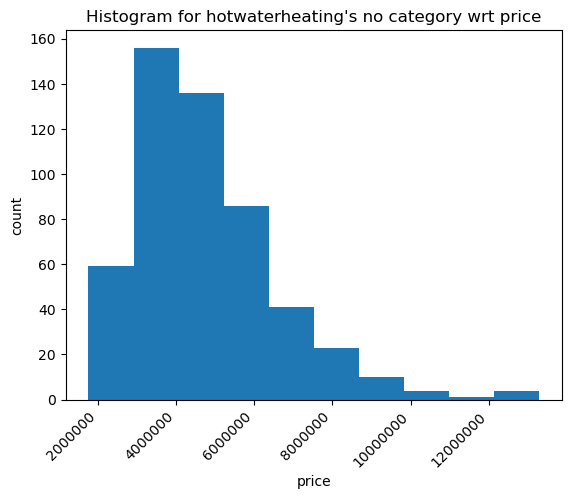

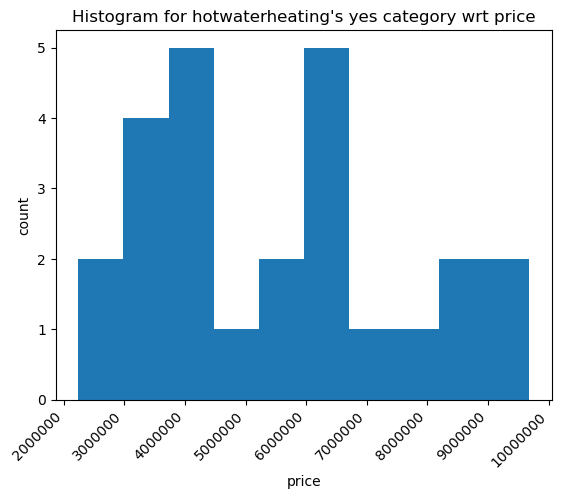

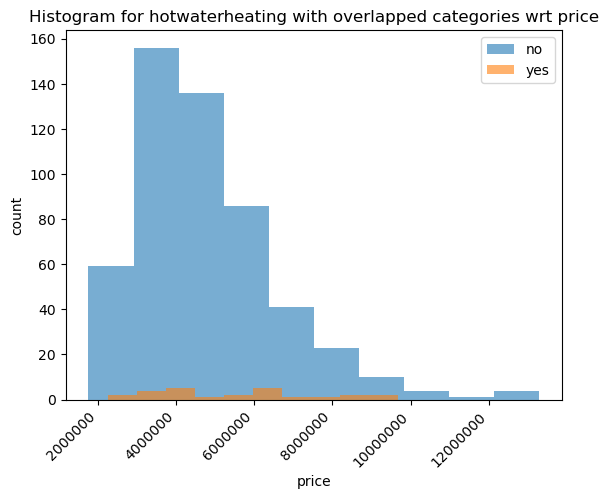








DATA FOR AIRCONDITIONING 

 COUNTS PER CATEGORY AIRCONDITIONING: 
 no     373
yes    172
Name: airconditioning, dtype: int64 

MEAN VALUES WRT PRICE: AIRCONDITIONING 
 airconditioning
no     4191940
yes    6013221
Name: price, dtype: int64 

MIN AND MAX WRT PRICE: airconditioning 
                  min_check  max_check
airconditioning                      
no                 1750000   12250000
yes                2233000   13300000 

25th QUANTILE WRT PRICE: AIRCONDITIONING 
 airconditioning
no     3150000.0
yes    4602500.0
Name: price, dtype: float64 

50th QUANTILE WRT PRICE: AIRCONDITIONING 
 airconditioning
no     3885000.0
yes    5757500.0
Name: price, dtype: float64 

75th QUANTILE WRT PRICE: AIRCONDITIONING 
 airconditioning
no     4900000.0
yes    7218750.0
Name: price, dtype: float64 



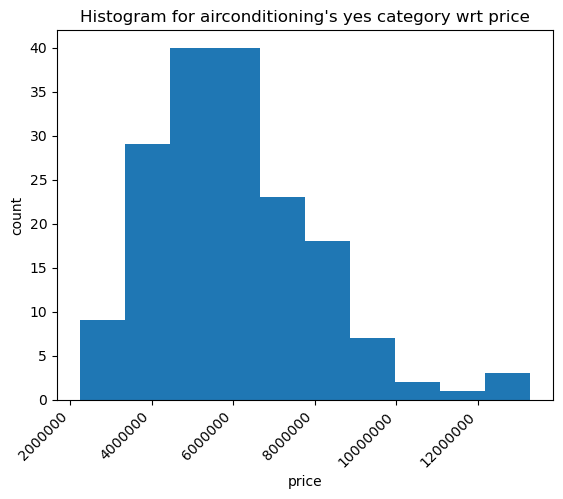

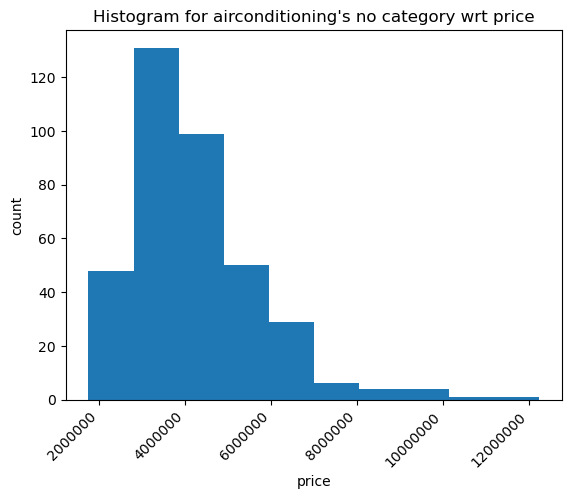

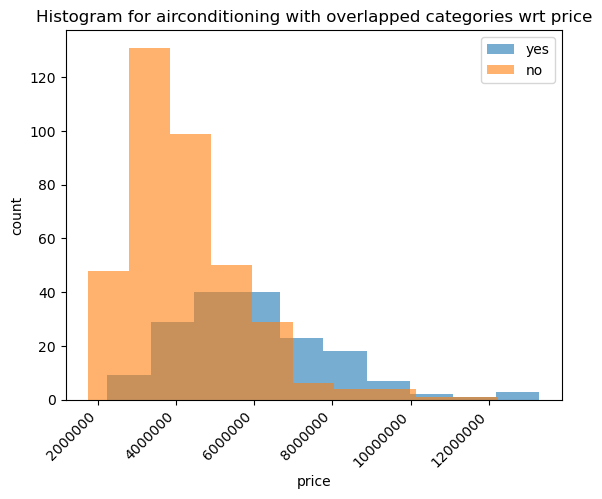








DATA FOR PREFAREA 

 COUNTS PER CATEGORY PREFAREA: 
 no     417
yes    128
Name: prefarea, dtype: int64 

MEAN VALUES WRT PRICE: PREFAREA 
 prefarea
no     4425299
yes    5879046
Name: price, dtype: int64 

MIN AND MAX WRT PRICE: prefarea 
           min_check  max_check
prefarea                      
no          1750000   12250000
yes         2233000   13300000 

25th QUANTILE WRT PRICE: PREFAREA 
 prefarea
no     3255000.0
yes    4548250.0
Name: price, dtype: float64 

50th QUANTILE WRT PRICE: PREFAREA 
 prefarea
no     4095000.0
yes    5582500.0
Name: price, dtype: float64 

75th QUANTILE WRT PRICE: PREFAREA 
 prefarea
no     5110000.0
yes    6650000.0
Name: price, dtype: float64 



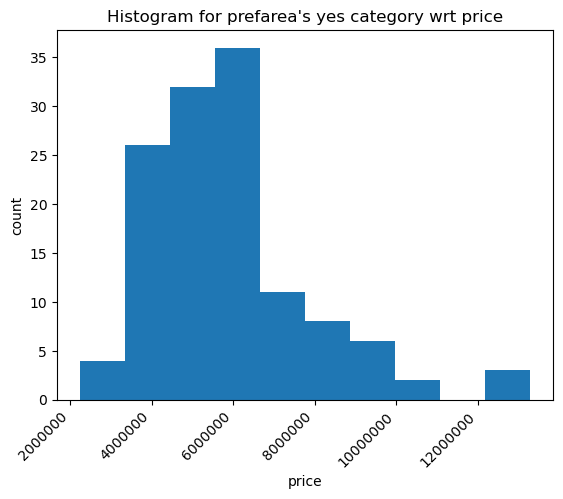

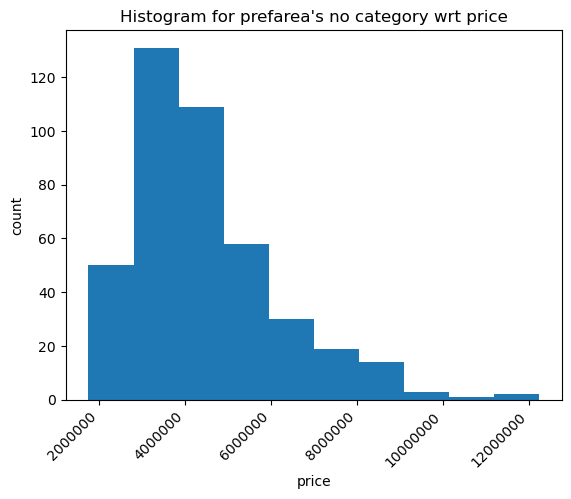

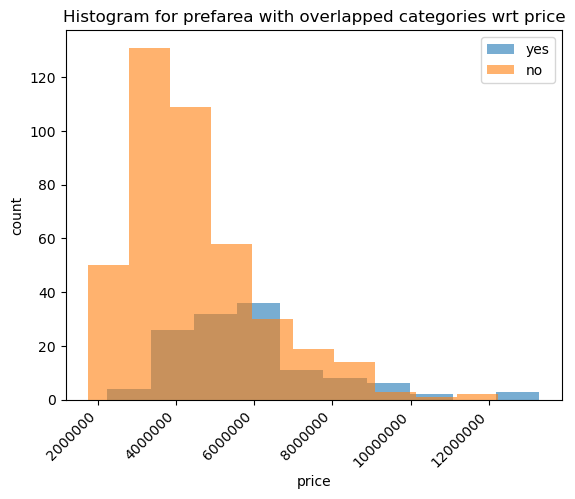








DATA FOR FURNISHINGSTATUS 

 COUNTS PER CATEGORY FURNISHINGSTATUS: 
 semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64 

MEAN VALUES WRT PRICE: FURNISHINGSTATUS 
 furnishingstatus
furnished         5495696
semi-furnished    4907524
unfurnished       4013831
Name: price, dtype: int64 

MIN AND MAX WRT PRICE: furnishingstatus 
                   min_check  max_check
furnishingstatus                      
furnished           1750000   13300000
semi-furnished      1767150   12250000
unfurnished         1750000   10150000 

25th QUANTILE WRT PRICE: FURNISHINGSTATUS 
 furnishingstatus
furnished         3876250.0
semi-furnished    3850000.0
unfurnished       2870000.0
Name: price, dtype: float64 

50th QUANTILE WRT PRICE: FURNISHINGSTATUS 
 furnishingstatus
furnished         5075000.0
semi-furnished    4585000.0
unfurnished       3430000.0
Name: price, dtype: float64 

75th QUANTILE WRT PRICE: FURNISHINGSTATUS 
 furnishingstatus
furn

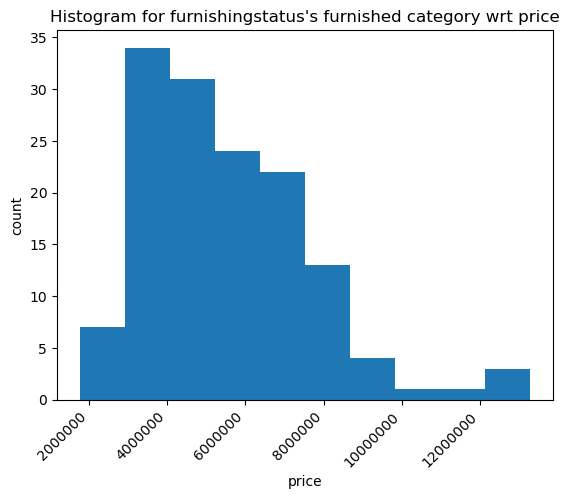

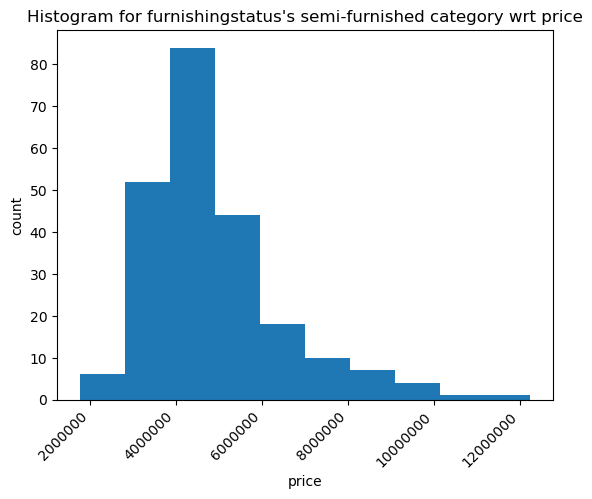

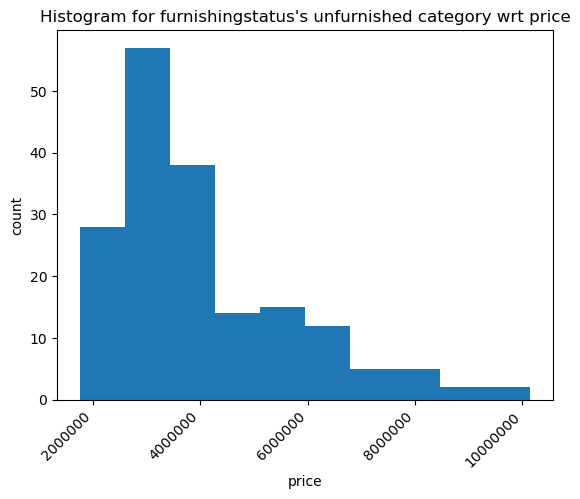

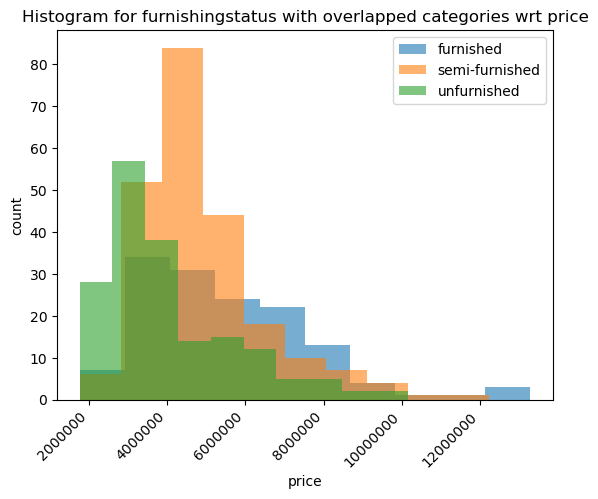

In [21]:
for col in col_categorical: #Filtering columns with categorical values and running a loop for bivariate analysis
    number_of_values = df[col].value_counts() #Check number of values per category
    cat_col_mean_wrt_price = pd.to_numeric(df.groupby(col)['price'].mean().apply(lambda x: '{:.0f}'.format(x))) #Finding mean wrt price
    cat_col_min_max_wrt_price = df.groupby(col)['price'].agg(min_check = 'min', max_check = 'max').round(0).astype(int) #Finding min and max wrt price
    quantile_25_col_wrt_price = df.groupby(col)['price'].quantile(0.25)
    quantile_50_col_wrt_price = df.groupby(col)['price'].quantile(0.50)
    quantile_75_col_wrt_price = df.groupby(col)['price'].quantile(0.75)
    #Heading and formatted printing of data
    print(f'DATA FOR {col.upper()}','\n')
    print(f' COUNTS PER CATEGORY {col.upper()}:', '\n', number_of_values, '\n')
    print(f'MEAN VALUES WRT PRICE: {col.upper()}','\n',cat_col_mean_wrt_price, '\n')
    print(f'MIN AND MAX WRT PRICE: {col}','\n',cat_col_min_max_wrt_price, '\n')
    print(f'25th QUANTILE WRT PRICE: {col.upper()}', '\n', quantile_25_col_wrt_price,'\n')
    print(f'50th QUANTILE WRT PRICE: {col.upper()}', '\n', quantile_50_col_wrt_price,'\n')
    print(f'75th QUANTILE WRT PRICE: {col.upper()}', '\n', quantile_75_col_wrt_price,'\n')
    unique_cols = df[col].unique() #Selects categories within each column 
    for value_of_col in unique_cols: #Looping of unique categories of columns
        #Creating histograms for each category of a column
        plt.hist(df[df[col] == value_of_col]['price'], bins = 10) 
        plt.title(f'''Histogram for {col}'s {value_of_col} category wrt price''')
        plt.xlabel('price')
        plt.ylabel('count')
        ax = plt.gca()
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x))) #Formatting the x-axis label to show whole number values
        plt.xticks(rotation = 45, ha = 'right') #Prevents x-axis values from overlapping
        plt.show()
    for value_of_col in unique_cols:
        #Creating one histogram of categories of each column, includes overlapping for easier visualisation
        plt.hist(df[df[col] == value_of_col]['price'], bins = 10, alpha = 0.6) 
        plt.title(f'''Histogram for {col} with overlapped categories wrt price''')
        plt.xlabel('price')
        plt.ylabel('count')
        ax = plt.gca()
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        plt.xticks(rotation = 45, ha = 'right')
    ax.legend(unique_cols)    #Creating a legend with category names
    plt.show()


    print('\n'*6)

In [22]:
df.groupby('parking')['mainroad'].value_counts()

parking  mainroad
0        yes         241
         no           58
1        yes         108
         no           18
2        yes         107
         no            1
3        yes          12
Name: mainroad, dtype: int64

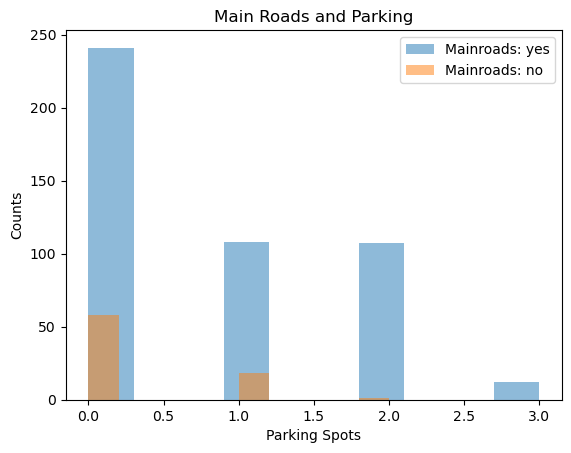

In [23]:
mainroad_yes_parking = df[df['mainroad']=='yes']['parking']
mainroad_no_parking = df[df['mainroad']=='no']['parking']
plt.hist(x= mainroad_yes_parking, bins = 10, alpha = 0.5) #Overlapping histograms for categorical values
plt.hist(x= mainroad_no_parking, bins = 10, alpha = 0.5)
plt.title('Main Roads and Parking')
plt.xlabel('Parking Spots')
plt.ylabel('Counts')
ax = plt.gca()
ax.legend(['Mainroads: yes','Mainroads: no'])
plt.show()

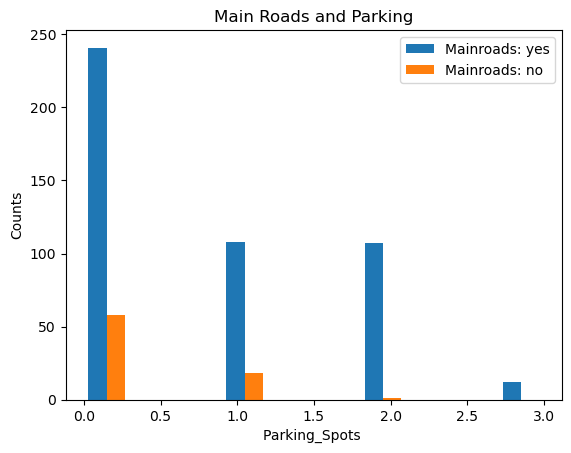

In [24]:
#Histograms side by side
plt.hist([df[df['mainroad'] == 'yes']['parking'], df[df['mainroad'] == 'no']['parking']], bins = 10, stacked = False)
plt.title('Main Roads and Parking')
plt.xlabel('Parking_Spots ')
plt.ylabel('Counts')
ax = plt.gca()
ax.legend(['Mainroads: yes','Mainroads: no'])
plt.show()


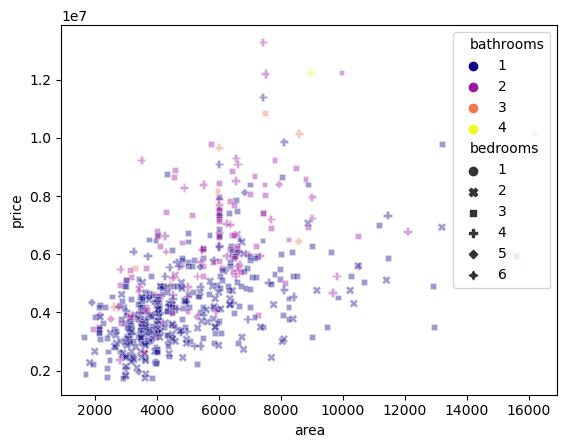

In [25]:
# Overanalysing, can be difficult to understand
custom_dark_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
sns.scatterplot(x = 'area', y = 'price', data = df, hue = 'bathrooms', alpha = 0.4, palette = 'plasma', style = 'bedrooms' )
plt.show()

In [27]:
#Contingency table
pd.crosstab(df['bedrooms'],df['bathrooms'])

bathrooms,1,2,3,4
bedrooms,,,,
1,2,0,0,0
2,128,8,0,0
3,224,72,4,0
4,42,48,4,1
5,4,4,2,0
6,1,1,0,0


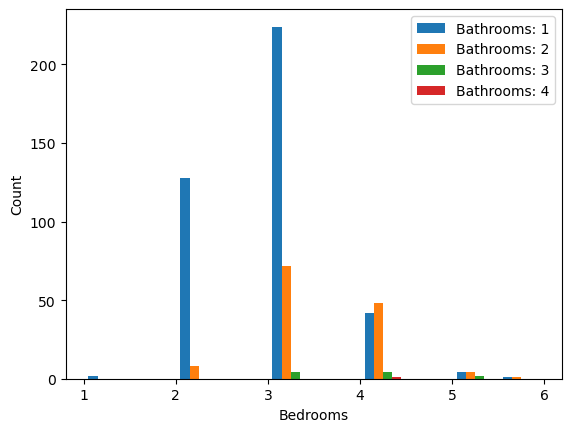

In [28]:
#Comparing bedrooms and bathrooms, wrt true counts
bedrooms_bathrooms_arrangement = [
    df[df['bathrooms']==1]['bedrooms'],
    df[df['bathrooms']==2]['bedrooms'],
    df[df['bathrooms']==3]['bedrooms'],
    df[df['bathrooms']==4]['bedrooms']
                                 ]
plt.hist(bedrooms_bathrooms_arrangement, bins = 10, stacked = False)
plt.xlabel('Bedrooms')
plt.ylabel('Count')
ax = plt.gca()
ax.legend(['Bathrooms: 1','Bathrooms: 2','Bathrooms: 3','Bathrooms: 4'])
plt.show()

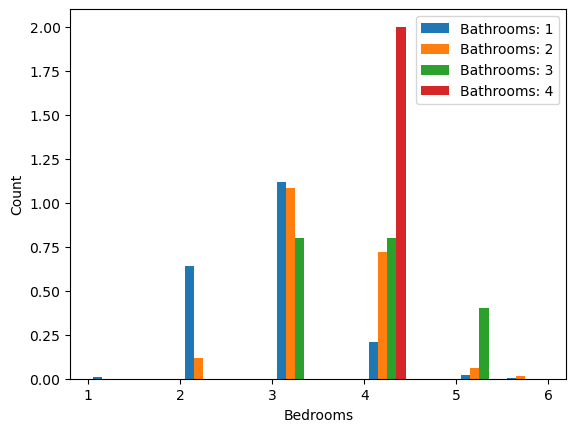

In [29]:
#Comparing bedrooms and bathrooms, wrt proportions
plt.hist(bedrooms_bathrooms_arrangement, bins = 10, density = True, stacked = False)
plt.xlabel('Bedrooms')
plt.ylabel('Count')
ax = plt.gca()
ax.legend(['Bathrooms: 1','Bathrooms: 2','Bathrooms: 3','Bathrooms: 4'])
plt.show()

In [30]:
col_numerical = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [31]:
#use the np.triu() numpy function to isolate the upper triangle of a matrix while turning all the values in the 
#lower triangle into 0. (The np.tril() function would do the same, only for the lower triangle.) Using the 
#np.ones_like() function will change all the isolated values into 1.

col_numerical_and_price = col_numerical + ['price']
corr_matrix_df = df[col_numerical_and_price].corr()
corr_matrix_df_wrt_price = corr_matrix_df[['price']].sort_values(by='price', ascending = False)
print(corr_matrix_df_wrt_price)
mask = np.tril(np.ones_like(corr_matrix_df, dtype = bool),k=0)

              price
price      1.000000
area       0.535997
bathrooms  0.517545
stories    0.420712
parking    0.384394
bedrooms   0.366494


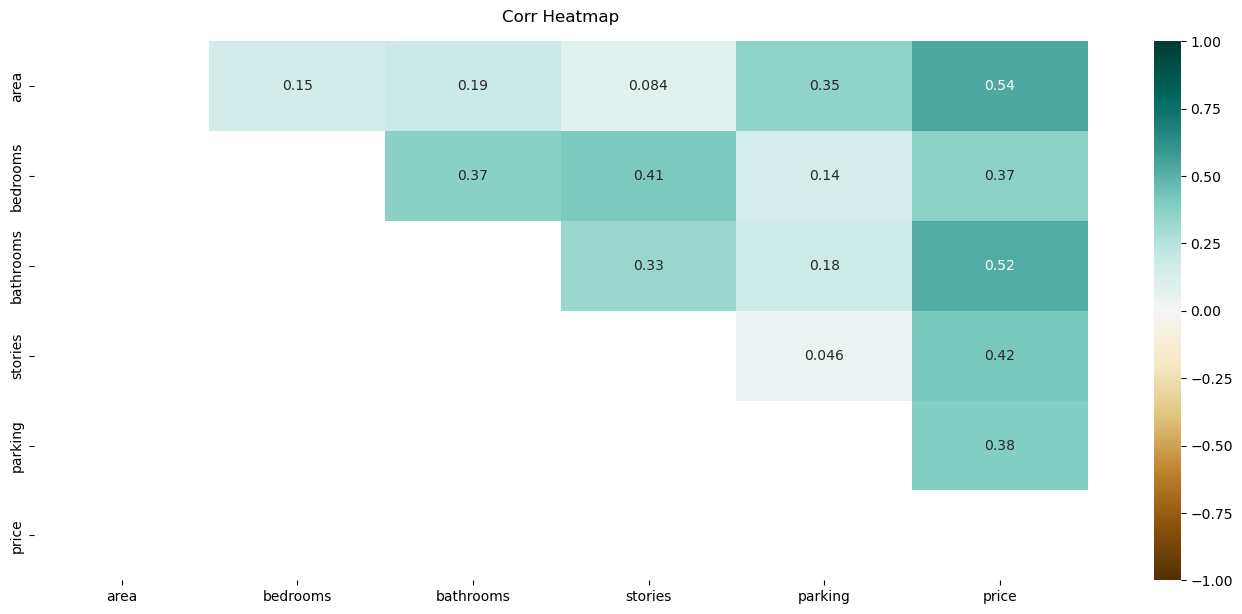

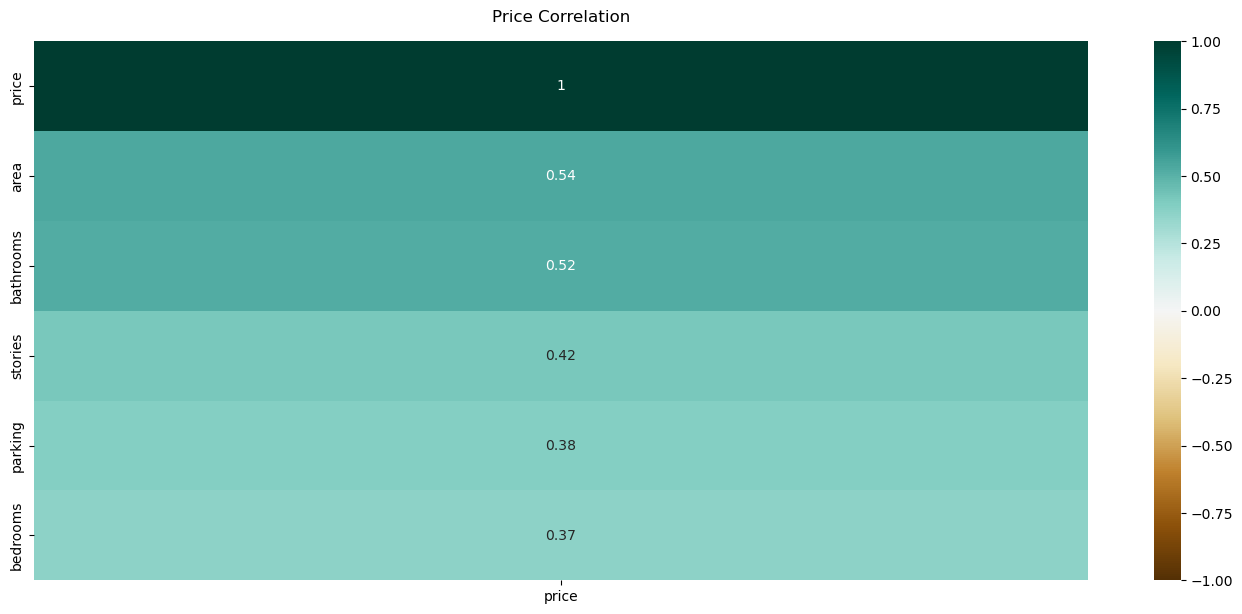

In [32]:
plt.figure(figsize = (17,7))
corr_heatmap = sns.heatmap(corr_matrix_df, vmin = -1, mask = mask, vmax = 1, annot = True, cmap = "BrBG")
plt.title('Corr Heatmap', pad = 14)
#plt.savefig('housing_heatmap.png', ddi = 300, bbox_inches = 'tight')
plt.show()
plt.figure(figsize = (17,7))
corr_heatmap_wrt_price = sns.heatmap(corr_matrix_df_wrt_price, vmin = -1, vmax = 1,  annot = True, cmap = "BrBG")
plt.title('Price Correlation', pad = 14)
plt.show()

# Data Preprocessing

In [33]:
#Creating a temporary dateframe as a safeguard incase we negatively affect the database 
temp_df = df.copy()
no_outlier_df = temp_df.copy()

In [37]:
#Converting categories to numerical values, i.e. label encoding
df.loc[df["mainroad"] == "yes", "mainroad"] = 1
df.loc[df["mainroad"] == "no", "mainroad"] = 0

In [38]:
#Converting categories to numerical values, i.e. label encoding
df.loc[df["guestroom"] == "yes", "guestroom"] = 1
df.loc[df["guestroom"] == "no", "guestroom"] = 0

In [39]:
#Converting categories to numerical values, i.e. label encoding
df.loc[df["basement"] == "yes", "basement"] = 1
df.loc[df["basement"] == "no", "basement"] = 0

In [40]:
#Converting categories to numerical values, i.e. label encoding
df.loc[df["hotwaterheating"] == "yes", "hotwaterheating"] = 1
df.loc[df["hotwaterheating"] == "no", "hotwaterheating"] = 0

In [41]:
#Converting categories to numerical values, i.e. label encoding
df.loc[df["airconditioning"] == "yes", "airconditioning"] = 1
df.loc[df["airconditioning"] == "no", "airconditioning"] = 0

In [42]:
#Converting categories to numerical values, i.e. label encoding
df.loc[df["prefarea"] == "yes", "prefarea"] = 1
df.loc[df["prefarea"] == "no", "prefarea"] = 0

In [43]:
#Converting categories to numerical values, i.e. label encoding
df.loc[df["furnishingstatus"] == "furnished", "furnishingstatus"] = 1
df.loc[df["furnishingstatus"] == "unfurnished", "furnishingstatus"] = 0
df.loc[df["furnishingstatus"] == "semi-furnished", "furnishingstatus"] = 0.5

# Train - Test Split

In [45]:
X = df.drop('price', axis = 1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 25)


In [46]:
#Scaling only area column
X_ar = df['area'].values.reshape(-1, 1)
rob_scaler = RobustScaler()
X_ar_scaled = rob_scaler.fit_transform(X_ar)
X_ar_scaled = rob_scaler.transform(X_ar)

X_ar_scaled_df = pd.DataFrame(X_ar_scaled, columns = ['area'])
X_to_be_joined = df.drop(['price','area'], axis = 1)
X_scaled_df = pd.concat([X_ar_scaled_df,X_to_be_joined], axis = 1)
X_scaled = X_scaled_df.values
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y, test_size = 0.2, random_state = 25)

#    # Feature Selection

In [47]:
df.var()
#Why axis

price               3.498544e+12
area                4.709512e+06
bedrooms            5.447383e-01
bathrooms           2.524757e-01
stories             7.525432e-01
mainroad            1.215461e-01
guestroom           1.465731e-01
basement            2.280559e-01
hotwaterheating     4.384781e-02
airconditioning     2.163923e-01
parking             7.423300e-01
prefarea            1.800324e-01
furnishingstatus    1.449221e-01
dtype: float64

In [48]:
df_numerical_only = df[col_numerical_and_price]
scaled_df_numerical = Normalizer().fit(df_numerical_only)
scaled_df_numerical_new = scaled_df_numerical.transform(df_numerical_only)
scaled_df_numerical_new.var(axis = 0)
print(scaled_df_numerical_new.var(axis = 0))
scaled_df_numerical_new_var = pd.DataFrame(scaled_df_numerical_new.var(axis = 0), index = col_numerical_and_price, columns = ['variance_scaled'])
print(scaled_df_numerical_new_var)


[1.91913091e-07 7.35908167e-14 1.23634339e-14 3.35694009e-14
 3.56264739e-14 4.47368133e-13]
           variance_scaled
area          1.919131e-07
bedrooms      7.359082e-14
bathrooms     1.236343e-14
stories       3.356940e-14
parking       3.562647e-14
price         4.473681e-13


In [49]:
#scaled_df_numerical_only = pd.DataFrame(scaled_df_numerical.fit_transform(df_numerical_only), columns = col_numerical_and_price)
#scaled_df_numerical_only.var()

# Linear Regression

In [51]:
#Creating a baseline model, i.e. Linear Regression
reg = linear_model.LinearRegression()

In [52]:
#Fitting the model
reg.fit(X_train, y_train)

LinearRegression()

In [53]:
#Checking coeffcients (weights) of the respective independent variables, i.e. features
reg_coef = reg.coef_
print(f'Coefficient {reg_coef}')

Coefficient [2.48993004e+02 1.54954155e+05 9.72291326e+05 4.53211277e+05
 3.93331026e+05 1.86205556e+05 3.72043967e+05 1.01400758e+06
 8.18279183e+05 2.60849564e+05 7.31087923e+05 4.47577694e+05]


In [54]:
#Calculating the coefficient of determination (R^2) 
reg_score_train = reg.score(X_train, y_train)
reg_score_test = reg.score(X_test, y_test)
print(reg_score_train, reg_score_test)

0.6817177238841317 0.664470612834447


In [55]:
reg_scaled = linear_model.LinearRegression()
reg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

# Predicting Data

In [56]:
y_pred = reg.predict(X_test)

In [57]:
mse_reg = MSE(y_test,y_pred)
rmse_reg = mse_reg ** (1/2)
print(f'MSE: {mse_reg}, RMSE: {rmse_reg}')

MSE: 1031192811027.6774, RMSE: 1015476.6422856202


In [58]:
#Loss in output
loss_function = (y_pred - y_test) ** 2
print(loss_function.astype(int))

[  156962049875    24308268772     5220631848   135187992917
   122913939437   581886918029    15953501026      248040194
  1032899399876    84027405872  4561228978252  1556303124514
   233133784326   751836254840   806822634644    16082921243
    72797609367    34129106472  1059409918623   111852962027
   147154679214   466645357382   621056420166   773770283004
   195612837251  1670020227265   539985855862   722379859832
  2266564370113    84926373599  2897171148854     9192970126
   912387322693     4758058330   119112126788   183699089108
      251044022    87191967389    22121683544    72251859101
    62880473507      717291456     2395537760   619310385555
   302145863057   699165059681   110630732227  2843491212867
  2516650314007   371740736232   354736828276    55649638690
  4831330199723  1054116795682   996380333484  1872759298007
   633685270617  2955973012105   275328382830    19934320072
    22340368086   895214196272   500617306595   107754547576
     3940287235  3413436

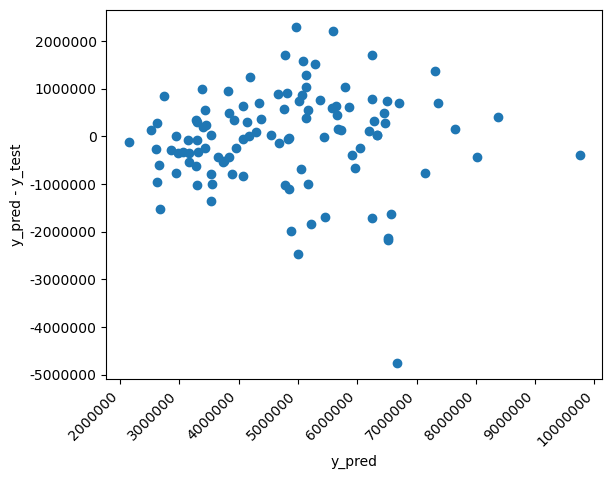

In [59]:
plt.scatter(y_pred, y_pred-y_test)
plt.xlabel('y_pred')
plt.ylabel('y_pred - y_test')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

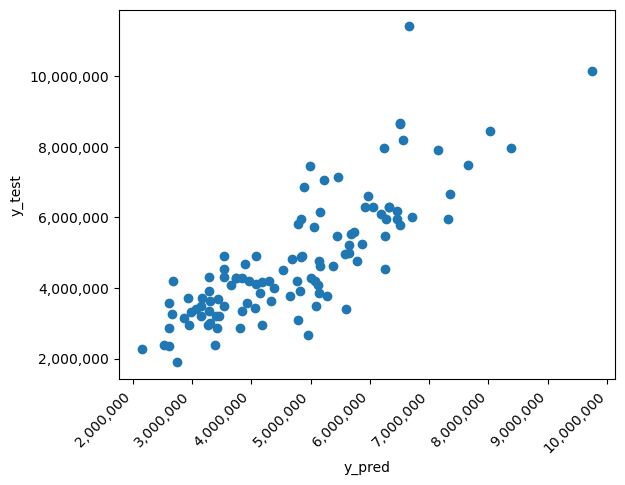

In [60]:
plt.scatter(y_pred, y_test, label = 'Data Points')
plt.xlabel('y_pred')
plt.ylabel('y_test')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [61]:
y_pred_scaled = reg_scaled.predict(X_test_scaled)

In [62]:
mse_reg_scaled = MSE(y_test,y_pred_scaled)
print(mse_reg_scaled)

1031192811027.6771


In [63]:
rmse_reg_scaled = MSE(y_test,y_pred_scaled) ** (1/2)
print(rmse_reg_scaled)

1015476.6422856201


In [64]:
reg_scaled_score_train = reg_scaled.score(X_train_scaled,y_train)
reg_scaled_score_test = reg_scaled.score(X_test_scaled,y_test)
print(f'reg_scaled_score_train: {reg_scaled_score_train} and reg_scaled_score_test: {reg_scaled_score_test}')

reg_scaled_score_train: 0.6817177238841317 and reg_scaled_score_test: 0.6644706128344471


In [65]:
loss_function = (y_pred_scaled - y_test) ** 2
print(loss_function.astype(int))

[  156962049875    24308268772     5220631848   135187992917
   122913939437   581886918029    15953501026      248040194
  1032899399876    84027405872  4561228978252  1556303124514
   233133784326   751836254840   806822634644    16082921243
    72797609367    34129106472  1059409918623   111852962027
   147154679214   466645357382   621056420166   773770283004
   195612837251  1670020227265   539985855862   722379859832
  2266564370113    84926373599  2897171148854     9192970126
   912387322693     4758058330   119112126788   183699089108
      251044022    87191967389    22121683544    72251859101
    62880473507      717291456     2395537760   619310385555
   302145863057   699165059681   110630732227  2843491212867
  2516650314006   371740736232   354736828276    55649638690
  4831330199723  1054116795682   996380333484  1872759298007
   633685270617  2955973012105   275328382830    19934320072
    22340368086   895214196272   500617306595   107754547576
     3940287235  3413436

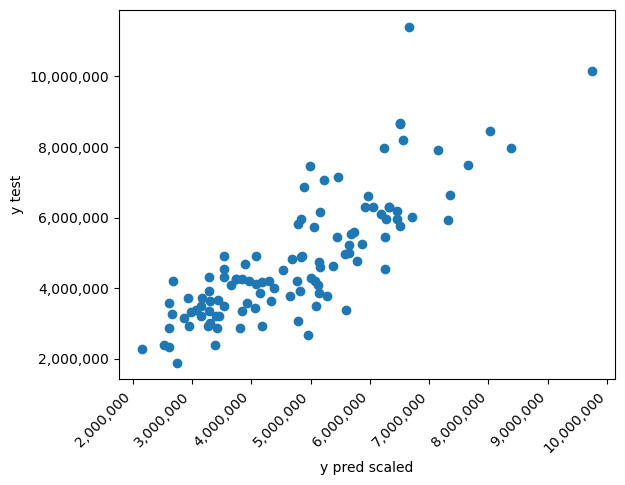

In [66]:
plt.scatter(y_pred_scaled, y_test, label = 'Data Points')
plt.xlabel('y pred scaled')
plt.ylabel('y test')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

# LASSO AND RIDGE REGRESSION

In [67]:
reg_lasso = linear_model.Lasso(alpha = 0.1)

In [68]:
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [69]:
y_pred_reg_lasso = reg_lasso.predict(X_test)

In [70]:
mse_reg_lasso = MSE(y_test, y_pred_reg_lasso)
rmse_reg_lasso = mse_reg_lasso ** (1/2)
print(f'mse_reg_lasso: {mse_reg_lasso} and rmse_reg_lasso: {rmse_reg_lasso}')

mse_reg_lasso: 1031192746620.3964 and rmse_reg_lasso: 1015476.6105727874


In [71]:
reg_lasso_score_train = reg_lasso.score(X_train, y_train)
reg_lasso_score_test = reg_lasso.score(X_test, y_test)
print(f'reg_lasso_score_train: {reg_lasso_score_train} and reg_lasso_score_test: {reg_lasso_score_test}')

reg_lasso_score_train: 0.6817177238839913 and reg_lasso_score_test: 0.66447063379128


In [72]:
reg_ridge = linear_model.Ridge(alpha = 0.1)

In [73]:
reg_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [74]:
y_pred_reg_ridge = reg_ridge.predict(X_test)

In [75]:
mse_reg_ridge = MSE(y_test, y_pred_reg_ridge)
rmse_reg_ridge = mse_reg_ridge ** (1/2)
print(f'mse_reg_lasso: {mse_reg_ridge} and rmse_reg_lasso: {rmse_reg_ridge}')

mse_reg_lasso: 1030918867733.0657 and rmse_reg_lasso: 1015341.7492317873


In [76]:
reg_ridge_score_train = reg_ridge.score(X_train, y_train)
reg_ridge_score_test = reg_ridge.score(X_test, y_test)
print(f'reg_ridge_score_train: {reg_ridge_score_train} and reg_ridge_score_test: {reg_ridge_score_test}')

reg_ridge_score_train: 0.6817172244023859 and reg_ridge_score_test: 0.6645597484691956


# USING A DECISION TREE MODEL

In [77]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [78]:
dt = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.01, random_state = 25)

In [79]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=25)

In [80]:
y_pred_dt = dt.predict(X_test)

In [81]:
mse_dt = MSE(y_test, y_pred_dt)

In [82]:
rmse_dt = mse_dt ** (1/2)

In [83]:
print(f'MSE: {mse_dt} and RMSE: {rmse_dt}')

MSE: 1393450202015.5972 and RMSE: 1180444.9169764752


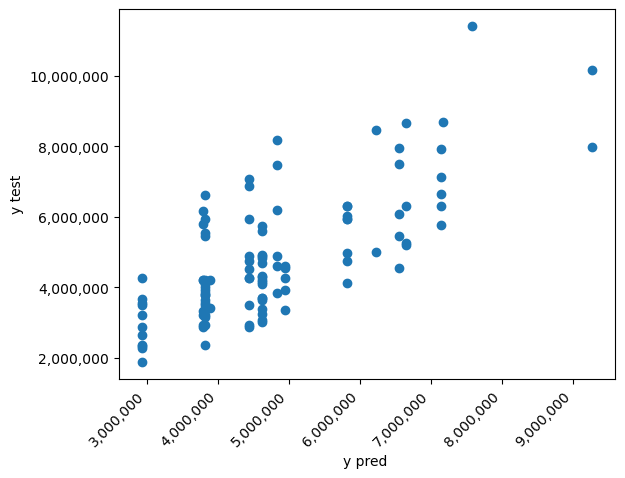

In [84]:
plt.scatter(y_pred_dt, y_test, label = 'Data Points')
plt.xlabel('y pred ')
plt.ylabel('y test')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [85]:
df_no_prices = df.drop('price',axis = 1).columns

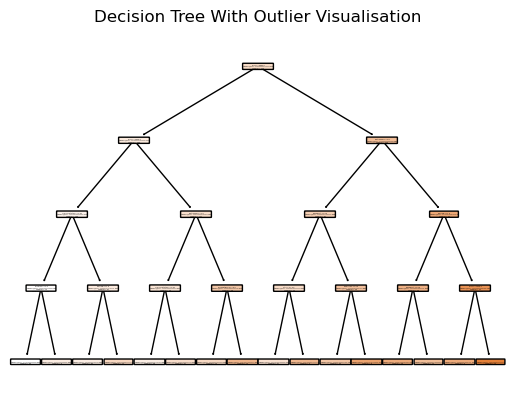

In [86]:
tree.plot_tree(dt, feature_names = df_no_prices, filled = True, rounded = True)
plt.title("Decision Tree With Outlier Visualisation")
plt.show()

In [87]:
dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)
print(f'dt_train_score: {dt_train_score} and dt_test_score: {dt_test_score}')

dt_train_score: 0.6374109597111963 and dt_test_score: 0.5465993485136307


# OUTLIER REMOVAL

In [88]:
filtered_for_outlier_df = no_outlier_df.drop(no_outlier_df[no_outlier_df['price'] > 10000000].index)

In [89]:
#Converting categories to numerical values, i.e. label encoding
filtered_for_outlier_df.loc[filtered_for_outlier_df["mainroad"] == "yes", "mainroad"] = 1
filtered_for_outlier_df.loc[filtered_for_outlier_df["mainroad"] == "no", "mainroad"] = 0

In [90]:
#Converting categories to numerical values, i.e. label encoding
filtered_for_outlier_df.loc[filtered_for_outlier_df["guestroom"] == "yes", "guestroom"] = 1
filtered_for_outlier_df.loc[filtered_for_outlier_df["guestroom"] == "no", "guestroom"] = 0

In [91]:
#Converting categories to numerical values, i.e. label encoding
filtered_for_outlier_df.loc[filtered_for_outlier_df["basement"] == "yes", "basement"] = 1
filtered_for_outlier_df.loc[filtered_for_outlier_df["basement"] == "no", "basement"] = 0

In [92]:
#Converting categories to numerical values, i.e. label encoding
filtered_for_outlier_df.loc[filtered_for_outlier_df["hotwaterheating"] == "yes", "hotwaterheating"] = 1
filtered_for_outlier_df.loc[filtered_for_outlier_df["hotwaterheating"] == "no", "hotwaterheating"] = 0

In [93]:
#Converting categories to numerical values, i.e. label encoding
filtered_for_outlier_df.loc[filtered_for_outlier_df["airconditioning"] == "yes", "airconditioning"] = 1
filtered_for_outlier_df.loc[filtered_for_outlier_df["airconditioning"] == "no", "airconditioning"] = 0

In [94]:
#Converting categories to numerical values, i.e. label encoding
filtered_for_outlier_df.loc[filtered_for_outlier_df["prefarea"] == "yes", "prefarea"] = 1
filtered_for_outlier_df.loc[filtered_for_outlier_df["prefarea"] == "no", "prefarea"] = 0

In [95]:
#Converting categories to numerical values, i.e. label encoding
filtered_for_outlier_df.loc[filtered_for_outlier_df["furnishingstatus"] == "furnished", "furnishingstatus"] = 1
filtered_for_outlier_df.loc[filtered_for_outlier_df["furnishingstatus"] == "unfurnished", "furnishingstatus"] = 0
filtered_for_outlier_df.loc[filtered_for_outlier_df["furnishingstatus"] == "semi-furnished", "furnishingstatus"] = 0.5

In [96]:
X_or = filtered_for_outlier_df.drop('price', axis = 1).values
y_or = filtered_for_outlier_df['price'].values

In [97]:
X_or_train, X_or_test, y_or_train, y_or_test = train_test_split(X_or,y_or, test_size = 0.2, random_state = 25)

In [98]:
reg_or = linear_model.LinearRegression()

In [99]:
reg_or.fit(X_or_train,y_or_train)

LinearRegression()

In [100]:
y_or_pred = reg_or.predict(X_or_test)

In [101]:
mse_reg_or = MSE(y_or_test, y_or_pred)
rmse_reg_or = mse_reg_or ** (1/2)
print(f'MSE: {mse_reg_or} and RMSE: {rmse_reg_or}')

MSE: 892451887524.5188 and RMSE: 944696.7172190866


In [102]:
reg_or_score_train = reg_or.score(X_or_train, y_or_train)
reg_or_score_test = reg_or.score(X_or_test, y_or_test)
print(f'reg_or_score_train: {reg_or_score_train} and reg_or_score_test: {reg_or_score_test}')

reg_or_score_train: 0.67445723545663 and reg_or_score_test: 0.6272961542731331


In [103]:
reg_or_mae = MAE(y_or_test, y_or_pred)
print(f'reg_or_mae: {reg_or_mae}')

reg_or_mae: 724252.6197643229


In [104]:
reg_or_r2_score = r2_score(y_or_test, y_or_pred)
print(f'reg_or_r2_score: {reg_or_r2_score}')

reg_or_r2_score: 0.6272961542731331


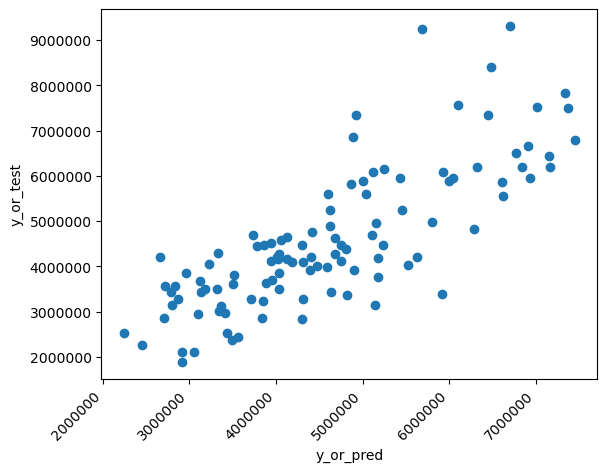

In [105]:
plt.scatter(y_or_pred, y_or_test)
plt.xlabel('y_or_pred')
plt.ylabel('y_or_test')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xticks(rotation = 45, ha = 'right' )
plt.show()

In [106]:
dt_or = DecisionTreeRegressor()

In [107]:
dt_or.fit(X_or_train,y_or_train)

DecisionTreeRegressor()

In [108]:
y_or_pred_dt = dt_or.predict(X_or_test)

In [109]:
dt_or_train_score = dt_or.score(X_or_train,y_or_train)
dt_or_test_score = dt_or.score(X_or_test,y_or_test)
print(f'Score of train set: {dt_or_train_score} and Score of test set: {dt_or_test_score}')

Score of train set: 0.9999924872703175 and Score of test set: 0.13306307315451482


In [110]:
dt_or_mse = MSE(y_or_test, y_or_pred_dt)
dt_or_rmse = dt_or_mse ** (1/2)
print((f'dt_or_mse: {dt_or_mse} and dt_or_rmse: {dt_or_rmse}'))

dt_or_mse: 2075909614560.1853 and dt_or_rmse: 1440801.726317742


# ONEHOT ENCODED

In [111]:
df_orginal_copy = original_df.copy()

In [112]:
df_extra = df_orginal_copy.copy()

In [113]:
encoded_df = pd.get_dummies(original_df, columns = col_categorical)

In [116]:
feature_names_encd = encoded_df.drop('price', axis = 1).columns
X_encd = encoded_df.drop('price', axis = 1).values
y_encd = encoded_df['price'].values
X_encd_train, X_encd_test, y_encd_train, y_encd_test = train_test_split(X_encd,y_encd, test_size = 0.2, random_state = 25)

# REGRESSION (LINEAR AND LASSO)

In [117]:
reg_encd = linear_model.LinearRegression()

In [118]:
reg_encd.fit(X_encd_train, y_encd_train)

LinearRegression()

In [119]:
y_reg_encd_pred = reg_encd.predict(X_encd_test)

In [120]:
mse_reg_encd = MSE(y_encd_test, y_reg_encd_pred)
rmse_reg_encd = mse_reg_encd ** (1/2)
print(f'mse_reg_encd: {mse_reg_encd} and rmse_reg_encd: {rmse_reg_encd}')

mse_reg_encd: 1063526177483.9384 and rmse_reg_encd: 1031274.0554692232


In [121]:
reg_encd_score_train = reg_encd.score(X_encd_train, y_encd_train)
reg_encd_score_test = reg_encd.score(X_encd_test, y_encd_test)
print(reg_encd_score_train, reg_encd_score_test )

0.685397191957754 0.6539499861232729


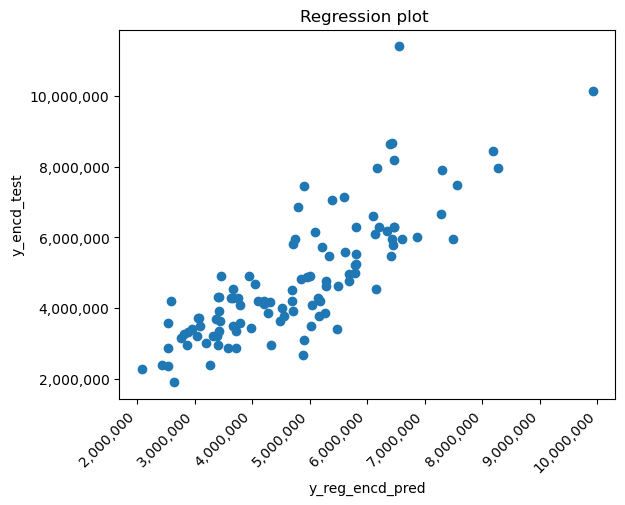

In [122]:
plt.scatter(y_reg_encd_pred, y_encd_test, label = 'Data Points')
plt.xlabel('y_reg_encd_pred')
plt.ylabel('y_encd_test')
plt.title('Regression plot ')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

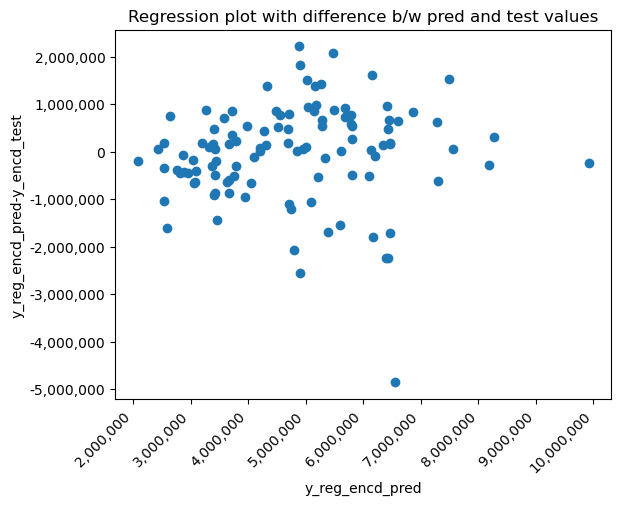

In [123]:
plt.scatter(y_reg_encd_pred, y_reg_encd_pred-y_encd_test, label = 'Data Points')
plt.xlabel('y_reg_encd_pred')
plt.ylabel('y_reg_encd_pred-y_encd_test')
plt.title('Regression plot with difference b/w pred and test values')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [124]:
lasso_encd = linear_model.Lasso(alpha = 0.1)

In [125]:
lasso_encd.fit(X_encd_train, y_encd_train)

Lasso(alpha=0.1)

In [126]:
y_lasso_encd_pred = lasso_encd.predict(X_encd_test)

In [127]:
mse_lasso_encd = MSE(y_encd_test, y_lasso_encd_pred)
rmse_lasso_encd = mse_lasso_encd ** (1/2)
print(f'mse_reg_encd: {mse_lasso_encd} and rmse_reg_encd: {rmse_lasso_encd}')

mse_reg_encd: 1063526073594.7008 and rmse_reg_encd: 1031274.0050998575


In [128]:
lasso_encd_score_train = lasso_encd.score(X_encd_train, y_encd_train)
lasso_encd_score_test = lasso_encd.score(X_encd_test, y_encd_test)
print(lasso_encd_score_train, lasso_encd_score_test )

0.6853971919576158 0.6539500199267398


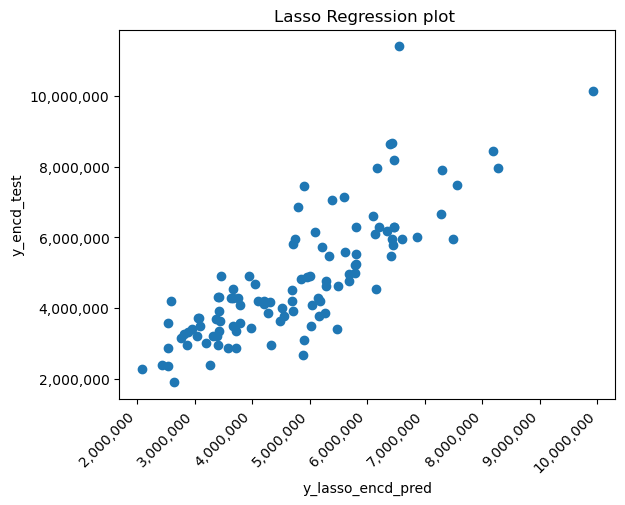

In [129]:
plt.scatter(y_lasso_encd_pred, y_encd_test, label = 'Data Points')
plt.xlabel('y_lasso_encd_pred')
plt.ylabel('y_encd_test')
plt.title('Lasso Regression plot ')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

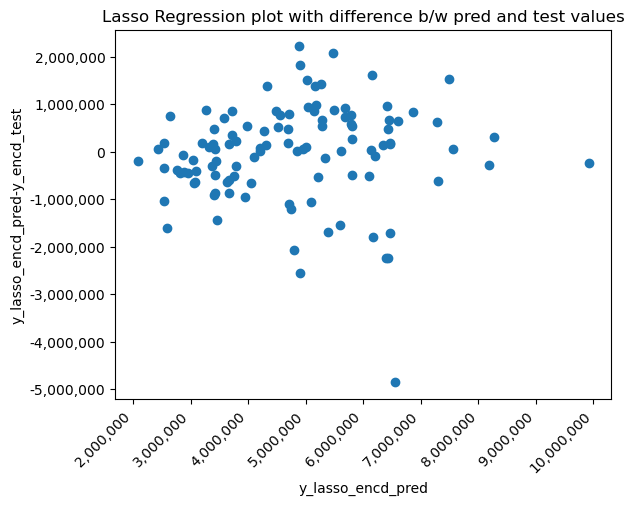

In [130]:
plt.scatter(y_lasso_encd_pred, y_lasso_encd_pred-y_encd_test, label = 'Data Points')
plt.xlabel('y_lasso_encd_pred')
plt.ylabel('y_lasso_encd_pred-y_encd_test')
plt.title('Lasso Regression plot with difference b/w pred and test values')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#  DECISION TREES WITH CATEGORICAL AND NUMERICAL DATA 

In [131]:
dt_encd = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 0.01, random_state = 3)

In [132]:
dt_encd.fit(X_encd_train, y_encd_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.01, random_state=3)

In [133]:
y_pred_dt_encd = dt_encd.predict(X_encd_test)

In [134]:
mse_dt_encd = MSE(y_encd_test, y_pred_dt_encd)
rmse_dt_encd = mse_dt_encd ** (1/2)
print(f'mse_dt_encd: {mse_dt_encd} and rmse_dt_encd: {rmse_dt_encd}')

mse_dt_encd: 1297602998743.074 and rmse_dt_encd: 1139123.785522484


In [135]:
dt_encd_score_train = dt_encd.score(X_encd_train, y_encd_train)
dt_encd_score_test = dt_encd.score(X_encd_test, y_encd_test)
print(f'dt_encd_score_train: {dt_encd_score_train} and dt_encd_score_test: {dt_encd_score_test}')

dt_encd_score_train: 0.7028993868305652 and dt_encd_score_test: 0.5777860994603445


# Random Forest

In [136]:
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 0.001, random_state = 789)

In [137]:
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=0.001, n_estimators=400,
                      random_state=789)

In [138]:
rf_y_pred = rf.predict(X_test)

In [139]:
mse_rf = MSE(y_test, rf_y_pred)
rmse_rf = mse_rf ** (1/2)
print(f'mse_rf: {mse_rf} and rmse_rf: {rmse_rf}')

mse_rf: 982868437574.1567 and rmse_rf: 991397.2148307442


In [140]:
rf_score_train = rf.score(X_train,y_train)
rf_score_test = rf.score(X_test,y_test)
print(f'rf_score_train: {rf_score_train} and rf_score_test: {rf_score_test}')

rf_score_train: 0.9447712712968078 and rf_score_test: 0.6801943913913011


In [141]:
df_cols = df.drop('price',axis = 1).columns
print(df_cols)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


In [142]:
importances_rf = pd.Series(rf.feature_importances_, index = df_cols )


In [143]:
sorted_importances_rf = importances_rf.sort_values()
print(sorted_importances_rf)

mainroad            0.008579
guestroom           0.015697
hotwaterheating     0.022129
basement            0.034754
prefarea            0.035301
bedrooms            0.037046
airconditioning     0.039542
stories             0.059448
parking             0.061434
furnishingstatus    0.061573
bathrooms           0.152663
area                0.471834
dtype: float64


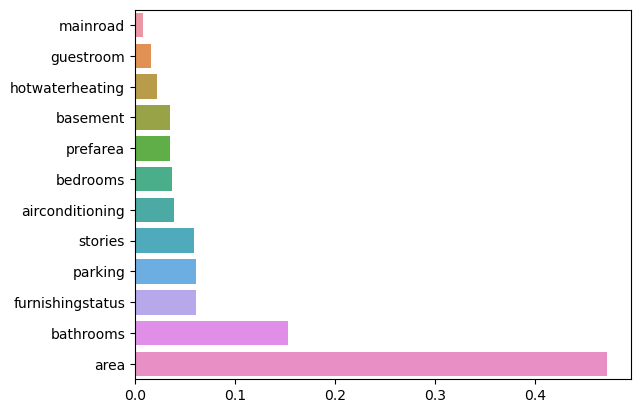

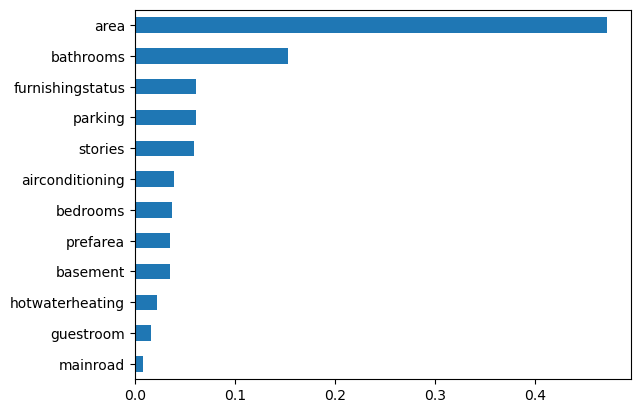

In [144]:
sns.barplot(x = sorted_importances_rf.values, y = sorted_importances_rf.index, )
plt.show()
sorted_importances_rf.plot(kind = 'barh')
plt.show()

In [145]:
rf_scaled = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 0.001, random_state = 789)

In [146]:
rf_scaled.fit(X_train_scaled,y_train)

RandomForestRegressor(min_samples_leaf=0.001, n_estimators=400,
                      random_state=789)

In [147]:
rf_y_pred_scaled = rf_scaled.predict(X_test_scaled)

In [148]:
mse_rf_scaled = MSE(y_test, rf_y_pred_scaled)
rmse_rf_scaled = mse_rf_scaled ** (1/2)
print(f'mse_rf_scaled: {mse_rf_scaled} and rmse_rf_scaled: {rmse_rf_scaled}')

mse_rf_scaled: 983072522517.0275 and rmse_rf_scaled: 991500.1374266306


In [149]:
rf_score_train_scaled = rf.score(X_train_scaled,y_train)
rf_score_test_scaled = rf.score(X_test_scaled,y_test)
print(f'rf_score_train: {rf_score_train_scaled} and rf_score_test: {rf_score_test_scaled}')

rf_score_train: -0.04650970504278562 and rf_score_test: -0.2093037824038968


In [150]:
importances_rf_scaled = pd.Series(rf_scaled.feature_importances_, index = df_cols)

In [151]:
sorted_importances_rf_scaled = importances_rf_scaled.sort_values()
print(sorted_importances_rf_scaled)

mainroad            0.008579
guestroom           0.015697
hotwaterheating     0.022129
basement            0.034754
prefarea            0.035301
bedrooms            0.037046
airconditioning     0.039542
stories             0.059448
parking             0.061434
furnishingstatus    0.061573
bathrooms           0.152663
area                0.471834
dtype: float64


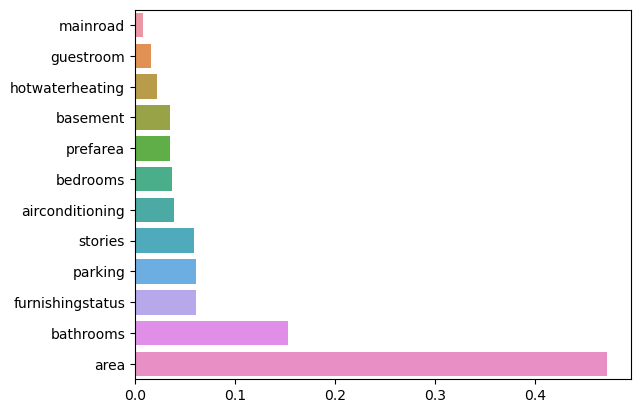

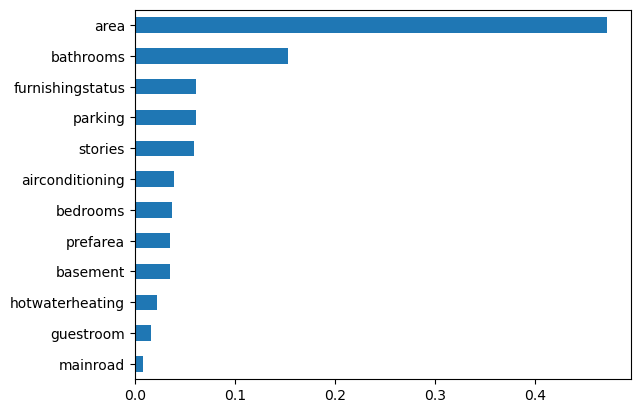

In [152]:
sns.barplot(x = sorted_importances_rf_scaled.values, y = sorted_importances_rf_scaled.index)
plt.show()
sorted_importances_rf_scaled.plot(kind = 'barh')
plt.show()

In [153]:
rf_encd = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 0.001, random_state = 789)

In [154]:
rf_encd.fit(X_encd_train,y_encd_train)

RandomForestRegressor(min_samples_leaf=0.001, n_estimators=400,
                      random_state=789)

In [155]:
rf_y_pred_encd = rf_encd.predict(X_encd_test)

In [156]:
mse_rf_encd = MSE(y_encd_test, rf_y_pred_encd)
rmse_rf_encd = mse_rf_encd ** (1/2)
print(f'mse_rf_encd: {mse_rf_encd} and rmse_rf_encd: {rmse_rf_encd}')

mse_rf_encd: 999345596380.179 and rmse_rf_encd: 999672.7446420548


In [157]:
rf_score_train_encd = rf_encd.score(X_encd_train,y_encd_train)
rf_score_test_encd = rf_encd.score(X_encd_test,y_encd_test)
print(f'rf_score_train: {rf_score_train_scaled} and rf_score_test: {rf_score_test_scaled}')

rf_score_train: -0.04650970504278562 and rf_score_test: -0.2093037824038968


In [158]:
importances_rf_encd = pd.Series(rf_encd.feature_importances_, index = feature_names_encd)

In [159]:
sorted_importances_rf_encd = importances_rf_encd.sort_values()

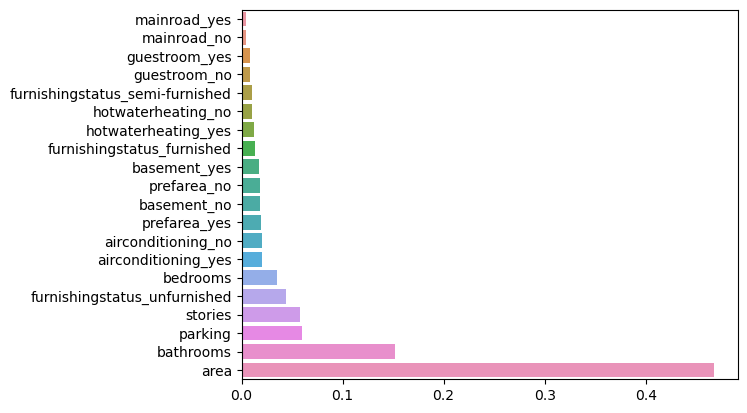

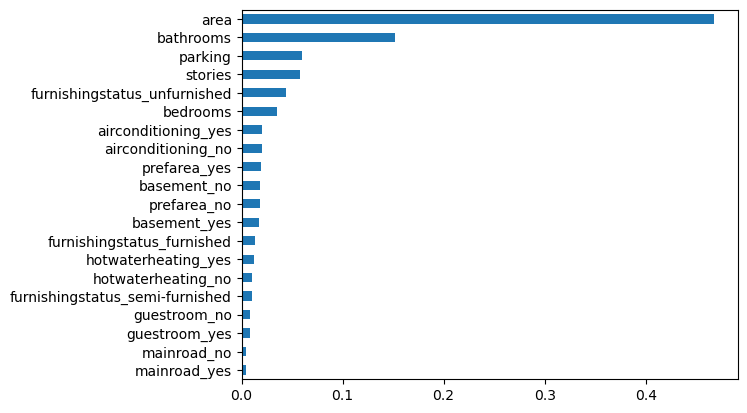

In [160]:
sns.barplot(x=sorted_importances_rf_encd.values, y = sorted_importances_rf_encd.index)
plt.show()
sorted_importances_rf_encd.plot(kind = 'barh')
plt.show()

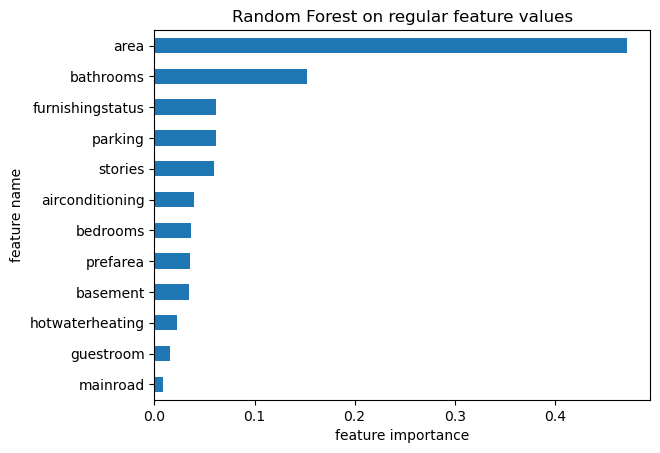

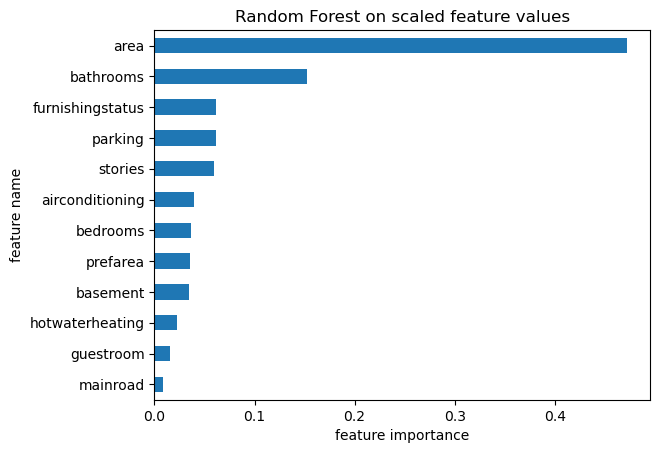

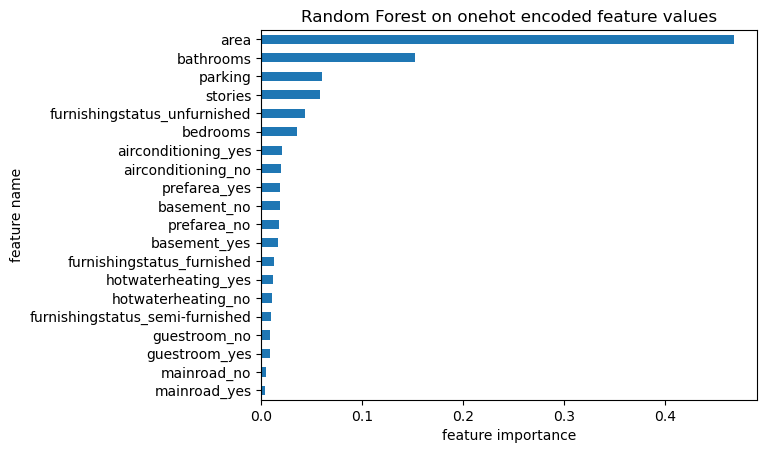

In [161]:
feature_importance_loop = {
    'Random Forest on regular feature values': sorted_importances_rf, 
    'Random Forest on scaled feature values': sorted_importances_rf_scaled, 
    'Random Forest on onehot encoded feature values': sorted_importances_rf_encd
}
for name, model in feature_importance_loop.items():
    model.plot(kind = 'barh')
    plt.title(name)
    plt.xlabel('feature importance')
    plt.ylabel('feature name')
    plt.show()

# XGBOOST

In [162]:
xb = xgb.XGBRegressor(n_estimators = 100)
xb.fit(X_train, y_train)
y_pred_xgb = xb.predict(X_test)
mse_xgb = MSE(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** (1/2)
xgb_score_train = xb.score(X_train, y_train)
xgb_score_test = xb.score(X_test, y_test)
print(f'mse_xgb: {mse_xgb} and rmse_xgb: {rmse_xgb} and xgb_score_train: {xgb_score_train} and xgb_score_test: {xgb_score_test}')

mse_xgb: 1100134536488.6921 and rmse_xgb: 1048872.9839635931 and xgb_score_train: 0.9972257698130104 and xgb_score_test: 0.6420383628743092


# ADABOOST

In [163]:
adb_dt = AdaBoostRegressor(estimator = dt, n_estimators = 100)

In [164]:
adb_dt.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4,
                                                  min_samples_leaf=0.01,
                                                  random_state=25),
                  n_estimators=100)

In [165]:
y_pred_adb = adb_dt.predict(X_test)

In [166]:
mse_adb = MSE(y_test, y_pred_adb)
rmse_adb = mse_adb ** (1/2)
print(f'mse_adb: {mse_adb} and rmse_adb: {rmse_adb}')

mse_adb: 1159510649383.0796 and rmse_adb: 1076805.7621424021


In [167]:
adb_score_train = adb_dt.score(X_train, y_train)
adb_score_test = adb_dt.score(X_test, y_test)
print(f'adb_score_train: {adb_score_train} and adb_score_test: {adb_score_test}')

adb_score_train: 0.7670693572612788 and adb_score_test: 0.6227185707280936


In [168]:
adb_or_reg = AdaBoostRegressor(estimator = reg_or, n_estimators = 100)

In [169]:
adb_or_reg.fit(X_or_train, y_or_train)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [170]:
y_pred_adb_or_reg = adb_or_reg.predict(X_or_test)

In [171]:
mse_adb_or_reg = MSE(y_or_test, y_pred_adb_or_reg)
rmse_adb_or_reg = mse_adb_or_reg ** (1/2)
print(f'mse_adb: {mse_adb_or_reg} and rmse_adb: {rmse_adb_or_reg}')

mse_adb: 1042676088950.0753 and rmse_adb: 1021115.1203219328


In [172]:
adb_or_reg_score_train = adb_or_reg.score(X_or_train, y_or_train)
adb_or_reg_score_test = adb_or_reg.score(X_or_test, y_or_test)
print(f'adb_or_reg_score_train: {adb_or_reg_score_train} and adb_or_reg_score_test: {adb_or_reg_score_test}')

adb_or_reg_score_train: 0.6638389528572928 and adb_or_reg_score_test: 0.5645598450387441


In [173]:
adb_reg = AdaBoostRegressor(estimator = reg, n_estimators = 100)

In [174]:
adb_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [175]:
y_pred_adb_reg = adb_reg.predict(X_test)

In [176]:
mse_adb_reg = MSE(y_test, y_pred_adb_reg)
rmse_adb_reg = mse_adb_reg ** (1/2)
print(f'mse_adb: {mse_adb_reg} and rmse_adb: {rmse_adb_reg}')

mse_adb: 1120046007829.7336 and rmse_adb: 1058322.2608590133


In [180]:
adb_reg_score_train = adb_reg.score(X_train, y_train)
adb_reg_score_test = adb_reg.score(X_test, y_test)
print(f'adb_reg_score_train: {adb_reg_score_train} and adb_reg_score_test: {adb_reg_score_test}')

adb_reg_score_train: 0.6699827707185307 and adb_reg_score_test: 0.6355595708335015
